# (2) Features Selection
In this notebook, we will look more into the types of data and select the features for our model.

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load datasets
train = pd.read_csv('datasets/train_clean.csv')
test = pd.read_csv('datasets/test_clean.csv')

In [3]:
# check cleaned Train Data loaded correctly
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2046 non-null   int64  
 1   PID              2046 non-null   int64  
 2   MS_SubClass      2046 non-null   int64  
 3   MS_Zoning        2046 non-null   object 
 4   Lot_Frontage     1716 non-null   float64
 5   Lot_Area         2046 non-null   int64  
 6   Street           2046 non-null   object 
 7   Alley            2046 non-null   object 
 8   Lot_Shape        2046 non-null   object 
 9   Land_Contour     2046 non-null   object 
 10  Utilities        2046 non-null   object 
 11  Lot_Config       2046 non-null   object 
 12  Land_Slope       2046 non-null   object 
 13  Neighborhood     2046 non-null   object 
 14  Condition_1      2046 non-null   object 
 15  Condition_2      2046 non-null   object 
 16  Bldg_Type        2046 non-null   object 
 17  House_Style   

In [4]:
# check cleaned Test Data loaded correctly
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS_SubClass      878 non-null    int64  
 3   MS_Zoning        878 non-null    object 
 4   Lot_Frontage     718 non-null    float64
 5   Lot_Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            878 non-null    object 
 8   Lot_Shape        878 non-null    object 
 9   Land_Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot_Config       878 non-null    object 
 12  Land_Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition_1      878 non-null    object 
 15  Condition_2      878 non-null    object 
 16  Bldg_Type        878 non-null    object 
 17  House_Style     

## Continuous, Discrete, Ordinal and Nominal Data

### (1) Continuous and Discrete 
These should have type float or integer.

### (2) Ordinal
Some of these are now string objects but we should convert them to integers.

### (3) Nominal
Regardless of data type, these should be one-hot encoded.

We remove Id and PID as they are unique identifiers that will not help in modelling, and put the rest into the above 3 types in 3 lists called features_val, features_ord and features_nom in the cell below.

In [5]:
features_val = ['Lot_Frontage', 'Lot_Area', 'Year_Built', 
                'Year_Remod/Add', 'Mas_Vnr_Area', 'BsmtFin_SF_1',
                'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', 
                '1st_Flr_SF', '2nd_Flr_SF', 'Low_Qual_Fin_SF', 
                'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath',
                'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 
                'TotRms_AbvGrd', 'Fireplaces', 'Garage_Yr_Blt', 
                'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF', 
                'Open_Porch_SF', 'Enclosed_Porch', '3Ssn_Porch',
                'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Mo_Sold', 
                'Yr_Sold'
               ]
features_ord = ['Lot_Shape', 'Utilities', 'Land_Slope', 'Overall_Qual', 
                'Overall_Cond', 'Exter_Qual', 'Exter_Cond', 'Bsmt_Qual', 
                'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2',
                'Heating_QC', 'Electrical', 'Kitchen_Qual', 'Functional', 
                'Fireplace_Qu', 'Garage_Finish', 'Garage_Qual', 'Garage_Cond',
                'Paved_Drive', 'Pool_QC', 'Fence'
               ]
features_nom = ['MS_SubClass', 'MS_Zoning', 'Street', 'Alley', 
                'Land_Contour', 'Lot_Config', 'Neighborhood', 'Condition_1', 
                'Condition_2', 'Bldg_Type', 'House_Style', 'Roof_Style', 
                'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 
                'Foundation', 'Heating', 'Central_Air', 'Garage_Type', 
                'Misc_Feature', 'Sale_Type'
               ]

In [6]:
# check that feature names have no typo
display(train[features_val].head(1))
display(train[features_ord].head(1))
display(train[features_nom].head(1))

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,1st_Flr_SF,...,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold
0,NaN,13517,1976,2005,289.0,533.0,0.0,192.0,725.0,725,...,475.0,0,44,0,0,0,0,0,3,2010


,Lot_Shape,Utilities,Land_Slope,Overall_Qual,Overall_Cond,Exter_Qual,Exter_Cond,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,...,Electrical,Kitchen_Qual,Functional,Fireplace_Qu,Garage_Finish,Garage_Qual,Garage_Cond,Paved_Drive,Pool_QC,Fence
0,IR1,AllPub,Gtl,6,8,Gd,TA,TA,TA,No,...,SBrkr,Gd,Typ,N_A,RFn,TA,TA,Y,N_A,N_A


,MS_SubClass,MS_Zoning,Street,Alley,Land_Contour,Lot_Config,Neighborhood,Condition_1,Condition_2,Bldg_Type,...,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Foundation,Heating,Central_Air,Garage_Type,Misc_Feature,Sale_Type
0,60,RL,Pave,N_A,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,...,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,Y,Attchd,N_A,WD


In [7]:
# check total number of features is correct at 80
len(features_val) + len(features_ord) + len(features_nom)

78

## (1) Continuous or Discrete
We want to check that they have the correct data types (only integers or floats) and then look at the correlations with SalePrice to pick the top few features to use for modelling.

In [8]:
# summary statistics
train[features_val].describe()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,1st_Flr_SF,...,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold
count,1716.000000,2046.000000,2046.000000,2046.000000,2024.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,...,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000
mean,68.733100,10014.759531,1971.739492,1984.171065,99.548913,439.931085,48.052786,568.380254,1056.364125,1161.263930,...,473.216031,93.873412,47.348485,22.523460,2.597752,16.551808,2.169110,51.700391,6.222385,2007.775660
std,21.695665,6582.239944,30.177099,21.031565,174.437435,446.975697,165.148546,445.079093,434.977794,384.124288,...,215.064622,128.616616,66.196930,59.763267,25.260113,57.438484,36.323644,574.088850,2.742210,1.313468
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,58.000000,7500.000000,1954.000000,1964.250000,0.000000,0.000000,0.000000,220.250000,793.000000,879.000000,...,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,68.000000,9417.500000,1974.000000,1993.000000,0.000000,368.000000,0.000000,475.500000,995.500000,1092.500000,...,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,80.000000,11500.000000,2001.000000,2004.000000,161.250000,733.750000,0.000000,811.000000,1318.750000,1403.750000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,200.000000,159000.000000,2010.000000,2010.000000,1600.000000,4010.000000,1474.000000,2336.000000,5095.000000,5095.000000,...,1356.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000


<AxesSubplot:>

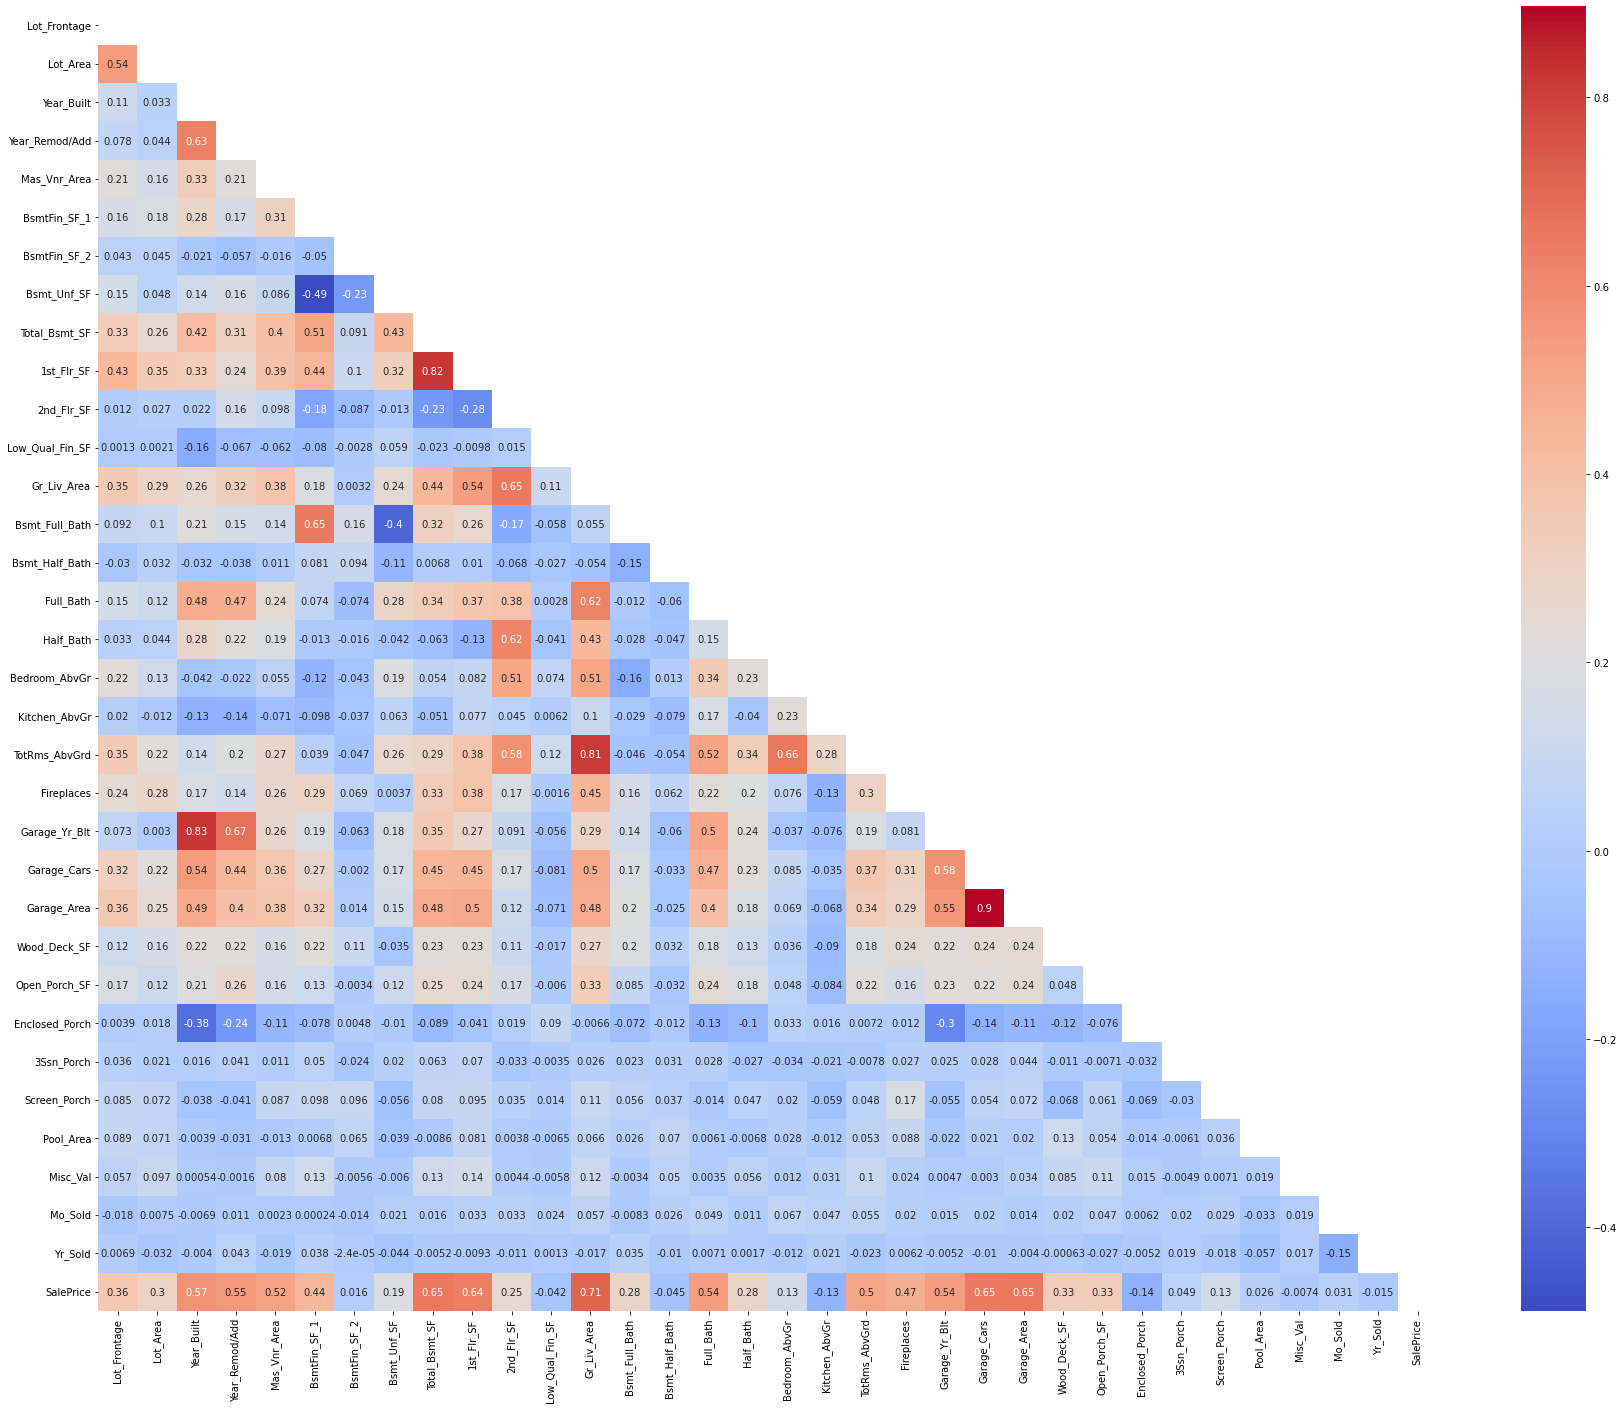

In [9]:
plt.figure(figsize=(30,24))
sns.heatmap(train[features_val+['SalePrice']].corr(), annot=True, cmap='coolwarm', 
            mask = np.triu(train[features_val+['SalePrice']].corr())
           )

### Interpretation from Heatmap
The features with more than 0.6 correlation are Total_Bsmt_SF, 1st_Flr_SF, Gr_Liv_Area, Garage_Cars, Garage_Area.

The features with correlation between 0.5 and 0.6 are Year_Built, Year_Remod/Add, Mas_Vnr_Area, Full_Bath, TotRms_AbvGrd, Garage_Yr_Blt.

The features with correlation between 0.4 and 0.5 are BsmtFin_SF_1 and Fireplaces.

Mas_Vnr_Area and Garage_Yr_Blt have missing values, so we investigate them further below.

### Mas_Vnr_Area

<AxesSubplot:>

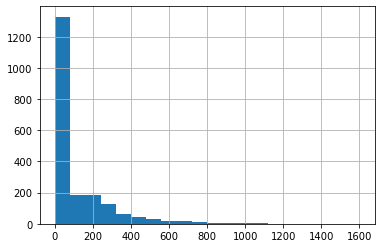

In [10]:
# plot distribution of Mas_Vnr_Area
train.Mas_Vnr_Area.hist(bins=20)

Since the distribution has a high peak at 0, imputing zero into the missing values should not change the shape of the distribution significantly. We double check the summary statistics before imputing the values permanently.

In [11]:
# summary statistics before change
train.Mas_Vnr_Area.describe()

count    2024.000000
mean       99.548913
std       174.437435
min         0.000000
25%         0.000000
50%         0.000000
75%       161.250000
max      1600.000000
Name: Mas_Vnr_Area, dtype: float64

In [12]:
# summary statistics after change
train.Mas_Vnr_Area.fillna(0).describe()

count    2046.000000
mean       98.478495
std       173.800277
min         0.000000
25%         0.000000
50%         0.000000
75%       159.500000
max      1600.000000
Name: Mas_Vnr_Area, dtype: float64

<AxesSubplot:>

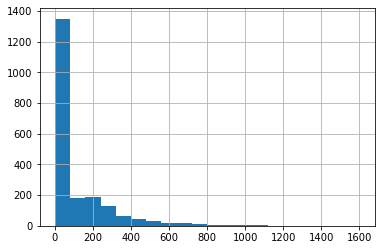

In [13]:
# impute Mas_Vnr_Area missing values with 0 and plot again
train.Mas_Vnr_Area.fillna(0, inplace=True)
train.Mas_Vnr_Area.hist(bins=20)

In [14]:
# impute Mas_Vnr_Area missing value in Test Data too
test.Mas_Vnr_Area.fillna(0, inplace=True)

### Garage_Yr_Blt
Since Garage_Yr_Blt is highly correlated to Year_Built, and we also suspect that it may be related to Year_Remod/Add, we use pairplots to see their relationships.

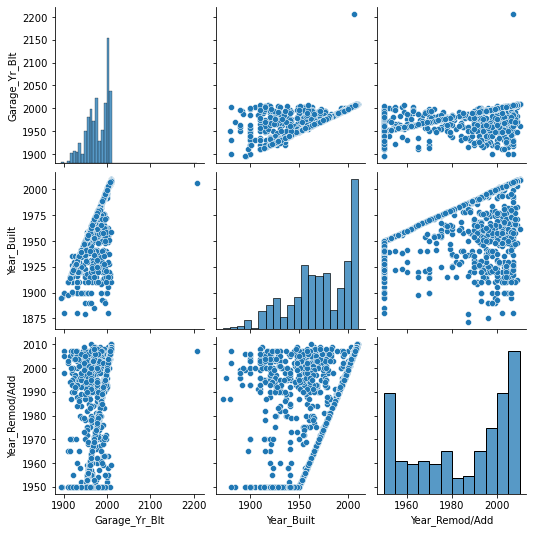

In [15]:
sns.pairplot(train[['Garage_Yr_Blt', 'Year_Built', 'Year_Remod/Add']])

There is an extreme outlier for Garage_Yr_Blt, which is an impossible value as it is in the future. We look for the value and remove it first.

In [16]:
train[train.Garage_Yr_Blt == train.Garage_Yr_Blt.max()][['Garage_Yr_Blt', 'Year_Built', 'Year_Remod/Add']]

,Garage_Yr_Blt,Year_Built,Year_Remod/Add
1695,2207.0,2006,2007


In [17]:
train.Garage_Yr_Blt[1695] = np.nan

/var/folders/f5/csz5_csd4c11cy5h6lqwj2nw0000gp/T/ipykernel_18716/45409781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Garage_Yr_Blt[1695] = np.nan


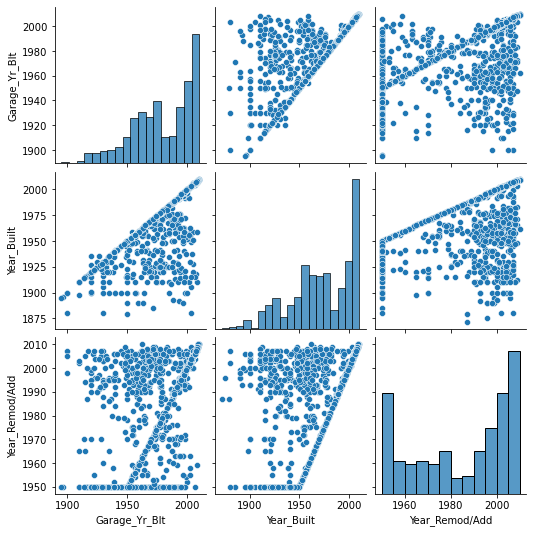

In [18]:
sns.pairplot(train[['Garage_Yr_Blt', 'Year_Built', 'Year_Remod/Add']])

Between Year_Blt and Year_Remod/Add, the scatter diagrams suggest a stronger relationship with Year_Remod/Add. We look for the correlation coefficients for confirmation.

In [19]:
train[['Garage_Yr_Blt', 'Year_Built', 'Year_Remod/Add']].corr()

,Garage_Yr_Blt,Year_Built,Year_Remod/Add
Garage_Yr_Blt,1.000000,0.837817,0.684195
Year_Built,0.837817,1.000000,0.630347
Year_Remod/Add,0.684195,0.630347,1.000000


The correlation with Year_Built is still stronger, so we will impute all missing values (including the one we just removed) with Year_Built.

In [20]:
# impute with Year Built for both Train and Test Data
train.Garage_Yr_Blt.fillna(train.Year_Built, inplace=True)
test.Garage_Yr_Blt.fillna(test.Year_Built, inplace=True)

### Features with values selected
We have selected the following 13 features and we put them in a list below.

In [21]:
features_val_selected = ['Total_Bsmt_SF', '1st_Flr_SF', 'Gr_Liv_Area', 'Garage_Area', 'Garage_Cars', 'Year_Built', 
                         'Year_Remod/Add', 'Mas_Vnr_Area', 'Full_Bath', 'TotRms_AbvGrd', 'Garage_Yr_Blt', 
                         'BsmtFin_SF_1', 'Fireplaces'
                        ]

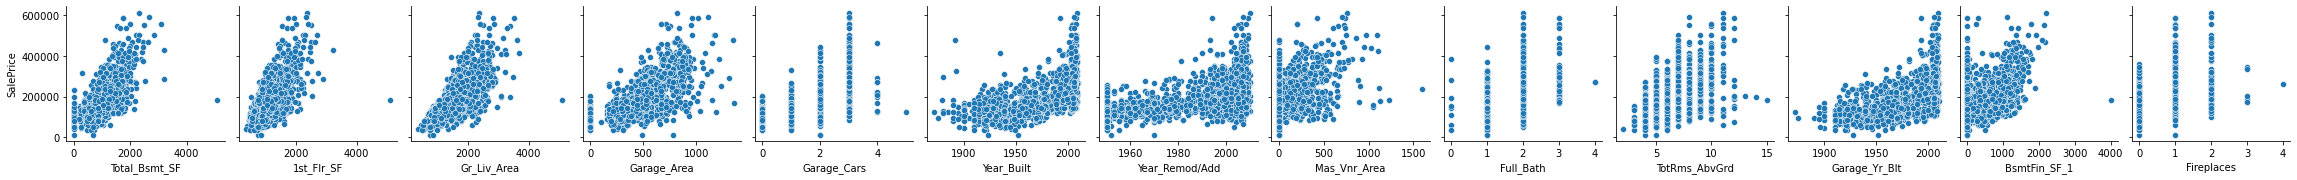

In [22]:
sns.pairplot(x_vars = features_val_selected, y_vars=['SalePrice'], data=train)

### Interpretation from Pairplot
We see a strong outlier on Total_Bsmt_SF, 1st_Flr_SF, Gr_Liv_Area and BsmtFin_SF_1.

We look at the data row for the outlier(s) and then check our Test Data to see if we should remove it.

In [23]:
train[train.Total_Bsmt_SF > 4000][features_val_selected]

,Total_Bsmt_SF,1st_Flr_SF,Gr_Liv_Area,Garage_Area,Garage_Cars,Year_Built,Year_Remod/Add,Mas_Vnr_Area,Full_Bath,TotRms_AbvGrd,Garage_Yr_Blt,BsmtFin_SF_1,Fireplaces
1880,5095.0,5095,5095,1154.0,3.0,2008,2009,1224.0,2,15,2008.0,4010.0,2


In [24]:
# check Test Data
print('Max Total_Bsmt_SF: \t' + str(test.Total_Bsmt_SF.max()))
print('Max 1st_Flr_SF: \t' + str(test['1st_Flr_SF'].max()))
print('Max Gr_Liv_Area: \t' + str(test.Gr_Liv_Area.max()))
print('Max BsmtFin_SF_1: \t' + str(test.BsmtFin_SF_1.max()))

Max Total_Bsmt_SF: 	2630
Max 1st_Flr_SF: 	2674
Max Gr_Liv_Area: 	4476
Max BsmtFin_SF_1: 	2288


### Remove Outliers
The extreme outlier for Total_Bsmt_SF, 1st_Flr_SF, Gr_Liv_Area and BsmtFin_SF_1 came from the same data point and the maximum values for these features in Test Data all lie significantly below this outlier's value, we remove row 1880.

In [25]:
train.drop(index = 1880, inplace=True)

<AxesSubplot:>

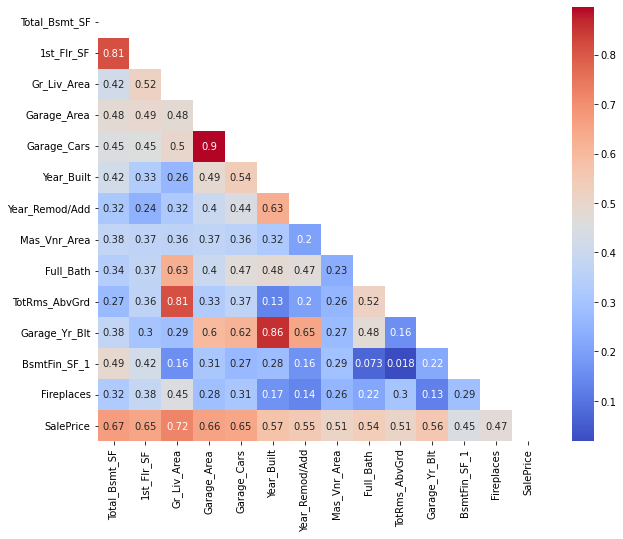

In [26]:
# repeat heatmap and pairplot with only features selected
plt.figure(figsize=(10,8))
sns.heatmap(train[features_val_selected+['SalePrice']].corr(), annot=True, cmap='coolwarm', 
            mask = np.triu(train[features_val_selected+['SalePrice']].corr())
           )

The 13 features have correlation above 0.4.

We note the high correlation (exceed 0.8) between the following 4 pairs and wish to remove the one with lower correlation to SalePrice from each pair.
- Total_Bsmt_SF and 1st_Flr_SF (remove 1st_Flr_SF)
- Gr_Liv_Area and TotRms_AbvGrd (remove TotRms_AbvGrd)
- Garage_Area and Garage_Cars (remove Garage_Cars)
- Year_Built and Garage_Yr_Blt (remove Garage_Yr_Blt)

We are thus left with 9 features and update our selected list below.

In [27]:
features_val_selected.remove('1st_Flr_SF')
features_val_selected.remove('TotRms_AbvGrd')
features_val_selected.remove('Garage_Cars')
features_val_selected.remove('Garage_Yr_Blt')

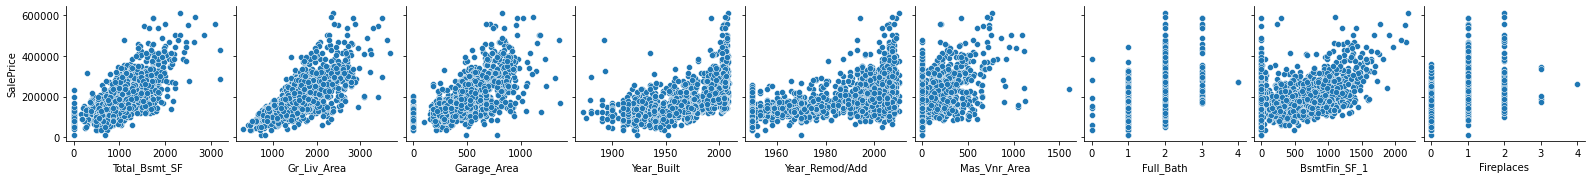

In [28]:
sns.pairplot(x_vars = features_val_selected, y_vars=['SalePrice'], data=train)

### Conclusion on Features with Values
We will use linear models with these 9 features as the features look largely linearly correlated with SalePrice.

## (2) Ordinal
We want to convert the data to integers and then look at the correlations with SalePrice to pick the top few features to use for modelling.

In [29]:
# check categories and number of observations in each category for each feature
for feature in features_ord:
    print(train[feature].value_counts())
    print()

Reg    1294
IR1     689
IR2      54
IR3       8
Name: Lot_Shape, dtype: int64

AllPub    2043
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

Gtl    1948
Mod      87
Sev      10
Name: Land_Slope, dtype: int64

5     561
6     506
7     430
8     250
4     158
9      77
3      29
10     21
2       9
1       4
Name: Overall_Qual, dtype: int64

5    1166
6     367
7     267
8     101
4      70
3      35
9      29
2       6
1       4
Name: Overall_Cond, dtype: int64

TA    1243
Gd     697
Ex      79
Fa      26
Name: Exter_Qual, dtype: int64

TA    1772
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter_Cond, dtype: int64

TA     887
Gd     862
Ex     182
Fa      60
N_A     53
Po       1
Name: Bsmt_Qual, dtype: int64

TA     1830
Gd       89
Fa       65
N_A      53
Po        5
Ex        3
Name: Bsmt_Cond, dtype: int64

No     1338
Av      288
Gd      200
Mn      163
N_A      56
Name: Bsmt_Exposure, dtype: int64

GLQ    612
Unf    603
ALQ    292
BLQ    200
Rec    183
LwQ   

### Features to drop
Some categories have very low number of observations and should not be included in our modelling. We take the cut-off to be 5%, which is around 100, so any categories with significantly less than 100 observations will be combined with neighbouring categories if possible, otherwise the entire feature may be dropped. We set our minimum observation size to be 90.

- Utilities, Garage_Qual, Garage_Cond, Pool_QC will be dropped
- The rest will be encoded using a function we will write below

In [30]:
# drop Utilities, Garage_Qual, Garage_Cond, Pool_QC from features_ord
for feature in ['Utilities', 'Garage_Qual', 'Garage_Cond', 'Pool_QC']:
    features_ord.remove(feature)

In [31]:
# write a function to encode ordinal features
def encode_ord(series, categories_list, values_list):
    transformed_list = []
    for x in series:
        value = values_list[categories_list.index(x)]
        transformed_list.append(value)
    return transformed_list

# test that our function works as intended
series = ['a', 'b', 'a', 'c', 'c', 'a']
cat = ['a', 'b', 'c']
val = ['0', '1', '2']
encode_ord(series, cat, val)

['0', '1', '0', '2', '2', '0']

In [32]:
# transform Lot Shape into 2 categories, 1 for Reg, 0 for the rest
train.Lot_Shape = encode_ord(train.Lot_Shape, ['Reg', 'IR1', 'IR2', 'IR3'], [1 , 0, 0, 0])

# transform Land Slope into 2 categories, 1 for Gtl, 0 for the rest
train.Land_Slope = encode_ord(train.Land_Slope, ['Gtl', 'Mod', 'Sev'], [1, 0, 0])

# transform Overall Qual by merging 1-4 and 9-10, using the weighted average for the values in the combined categories
# calculate weighted average for 1-4
wt1 = (1*4 + 2*9 + 3*29 + 4*158) / (4+9+29+158)
# calculate weighted average for 9-10
wt2 = (9*77 + 10*21) / (77+21)
train.Overall_Qual = encode_ord(train.Overall_Qual, [1,2,3,4,5,6,7,8,9,10], [wt1,wt1,wt1,wt1,5,6,7,8,wt2,wt2])

# transform Overall Cond by merging 1-4 and 8-9, using the weighted average for the values in the combined categories
# calculate weighted average for 1-4
wt3 = (1*4 + 2*6 + 3*35 + 4*70) / (4+6+35+70)
# calculate weighted average for 8-9
wt4 = (8*101 + 9*29) / (101+29)
train.Overall_Cond = encode_ord(train.Overall_Cond, [1,2,3,4,5,6,7,8,9], [wt3,wt3,wt3,wt3,5,6,7,wt4,wt4])

# transform Exter_Qual into 2 categories, 1 for Ex/Gd and 0 for TA/Fa
train.Exter_Qual = encode_ord(train.Exter_Qual, ['Ex', 'Gd', 'TA', 'Fa'], [1 , 1, 0, 0])

# transform Exter_Cond into 2 categories, 1 for Ex/Gd and 0 for TA/Fa/Po
train.Exter_Cond = encode_ord(train.Exter_Cond, ['Ex', 'Gd', 'TA', 'Fa', 'Po'], [1 , 1, 0, 0, 0])

In [33]:
# transform Bsmt_Qual into 4 categories, 3 for Ex, 2 for Gd, 1 for TA, 0 for Fa/Po/N_A
train.Bsmt_Qual = encode_ord(train.Bsmt_Qual, ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'N_A'], [3,2,1,0,0,0])

# transform Bsmt_Cond into 3 categories, 2 for Ex/Gd, 1 for TA, 0 for Fa/Po/N_A
train.Bsmt_Cond = encode_ord(train.Bsmt_Cond, ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'N_A'], [2,2,1,0,0,0])

# transform Bsmt_Exposure into 4 categories, 3 for Gd, 2 for Av, 1 for Mn, 0 for No/N_A
train.Bsmt_Exposure = encode_ord(train.Bsmt_Exposure, ['Gd', 'Av', 'Mn', 'No', 'N_A'], [3,2,1,0,0])

# transform BsmtFin_Type_1 into 6 categories, 5 for GLQ, 4 for ALQ, 3 for BLQ, 2 for Rec, 1 for LwQ, 0 for Unf/N_A
train.BsmtFin_Type_1 = encode_ord(train.BsmtFin_Type_1, 
                                  ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'N_A'], 
                                  [5,4,3,2,1,0,0]
                                 )

# transform BsmtFin_Type_2 into 3 categories, 2 for GLQ/ALQ/BLQ, 1 for Rec/LwQ, 0 for Unf/N_A
train.BsmtFin_Type_2 = encode_ord(train.BsmtFin_Type_2, 
                                  ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'N_A'], 
                                  [2,2,2,1,1,0,0]
                                 )

In [34]:
# transform Heating_QC into 3 categories, 2 for Ex, 1 for Gd, 0 for the rest
train.Heating_QC = encode_ord(train.Heating_QC, ['Ex', 'Gd', 'TA', 'Fa', 'Po'], [2 , 1, 0, 0, 0])

# transform Electrical into 2 categories, 1 for SBrkr, 0 for the rest
train.Electrical = encode_ord(train.Electrical, ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], [1,0,0,0,0])

# transform Kitchen_Qual into 3 categories, 2 for Ex, 1 for Gd, 0 for TA/Fa
train.Kitchen_Qual = encode_ord(train.Kitchen_Qual, ['Ex', 'Gd', 'TA', 'Fa'], [2 , 1, 0, 0])

# transform Functional into 2 categories, 1 for Typ, 0 for the rest
train.Functional = encode_ord(train.Functional, 
                              ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'],
                              [1,0,0,0,0,0,0,0]
                             )

# transform Fireplace_Qu into 4 categories, 3 for Ex/Gd, 2 for TA, 1 for Fa/Po, 0 for N_A
train.Fireplace_Qu = encode_ord(train.Fireplace_Qu, ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'N_A'], [3,3,2,1,1,0])

# transform Garage_Finish into 4 categories, 3 for Fin, 2 for RFn, 1 for Unf, 0 for N_A
train.Garage_Finish = encode_ord(train.Garage_Finish, ['Fin', 'RFn', 'Unf', 'N_A'], [3,2,1,0])

# transform Paved_Drive into 2 categories, 1 for Y, 0 for P/N
train.Paved_Drive = encode_ord(train.Paved_Drive, ['Y', 'P', 'N'], [1,0,0])

# transform Fence into 2 categories, 0 for N_A, 1 for the rest
train.Fence = encode_ord(train.Fence, ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'N_A'], [1,1,1,1,0])

In [35]:
# check categories (should be numbers now) and percentage of observations in each category after transformations
for feature in features_ord:
    print(train[feature].value_counts(normalize=True))
    print()

1    0.632763
0    0.367237
Name: Lot_Shape, dtype: float64

1    0.952567
0    0.047433
Name: Land_Slope, dtype: float64

5.000000    0.274328
6.000000    0.247433
7.000000    0.210269
8.000000    0.122249
3.705000    0.097800
9.214286    0.047922
Name: Overall_Qual, dtype: float64

5.000000    0.570171
6.000000    0.179462
7.000000    0.130562
8.223077    0.063570
3.486957    0.056235
Name: Overall_Cond, dtype: float64

0    0.620538
1    0.379462
Name: Exter_Qual, dtype: float64

0    0.891443
1    0.108557
Name: Exter_Cond, dtype: float64

1    0.433741
2    0.421516
3    0.088998
0    0.055746
Name: Bsmt_Qual, dtype: float64

1    0.894866
0    0.060147
2    0.044988
Name: Bsmt_Cond, dtype: float64

0    0.681663
2    0.140831
3    0.097800
1    0.079707
Name: Bsmt_Exposure, dtype: float64

0    0.320782
5    0.299267
4    0.142787
3    0.097800
2    0.089487
1    0.049878
Name: BsmtFin_Type_1, dtype: float64

0    0.879707
1    0.068460
2    0.051834
Name: BsmtFin_Type_2, dtype: 

### Features Selection from Ordinal Features

/Users/family/opt/anaconda3/envs/nov20/lib/python3.8/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


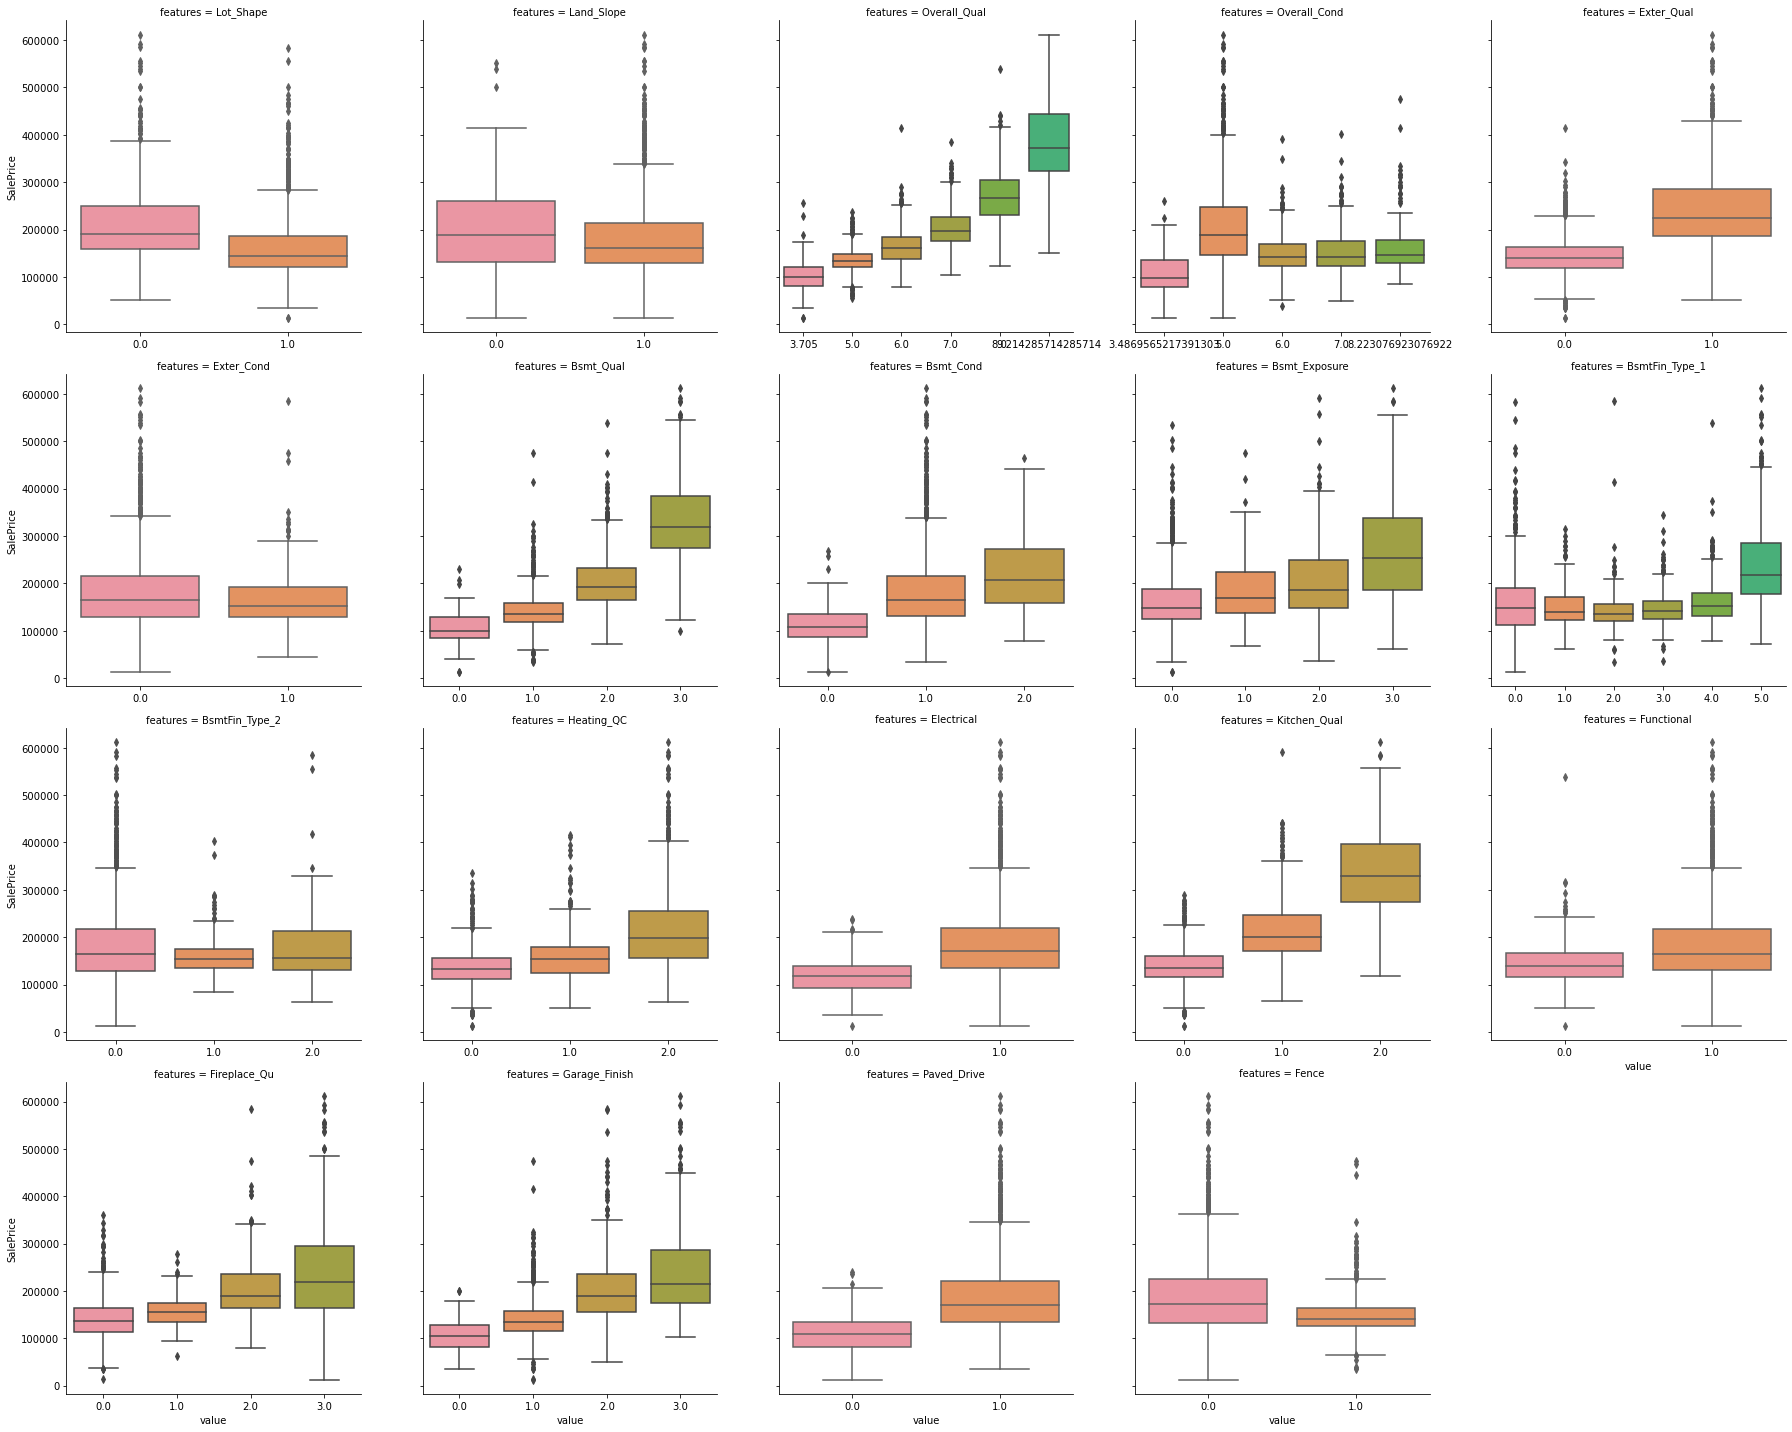

In [36]:
# boxplots
train_melt_ord = train[features_ord+['SalePrice']].melt(id_vars=['SalePrice'], var_name='features')
sns.catplot(data=train_melt_ord, x='value', y='SalePrice', col='features', col_wrap=5, kind='box', sharex=False)

### Interpretation from Boxplots
Some features show more obvious trend of higher SalePrice with higher ordinal value (25th percentile, median and 75th percentile all increasing), such as Overall_Qual, Exter_Qual, Bsmt_Qual, Bsmt_Cond, Bsmt_Exposure, Heating_QC, Electrical, Kitchen_Qual, Functional, Fireplace_Qu, Garage_Finish and Paved_Drive.

We will look at the correlation coefficients too before making our decision on which features to pick.

<AxesSubplot:>

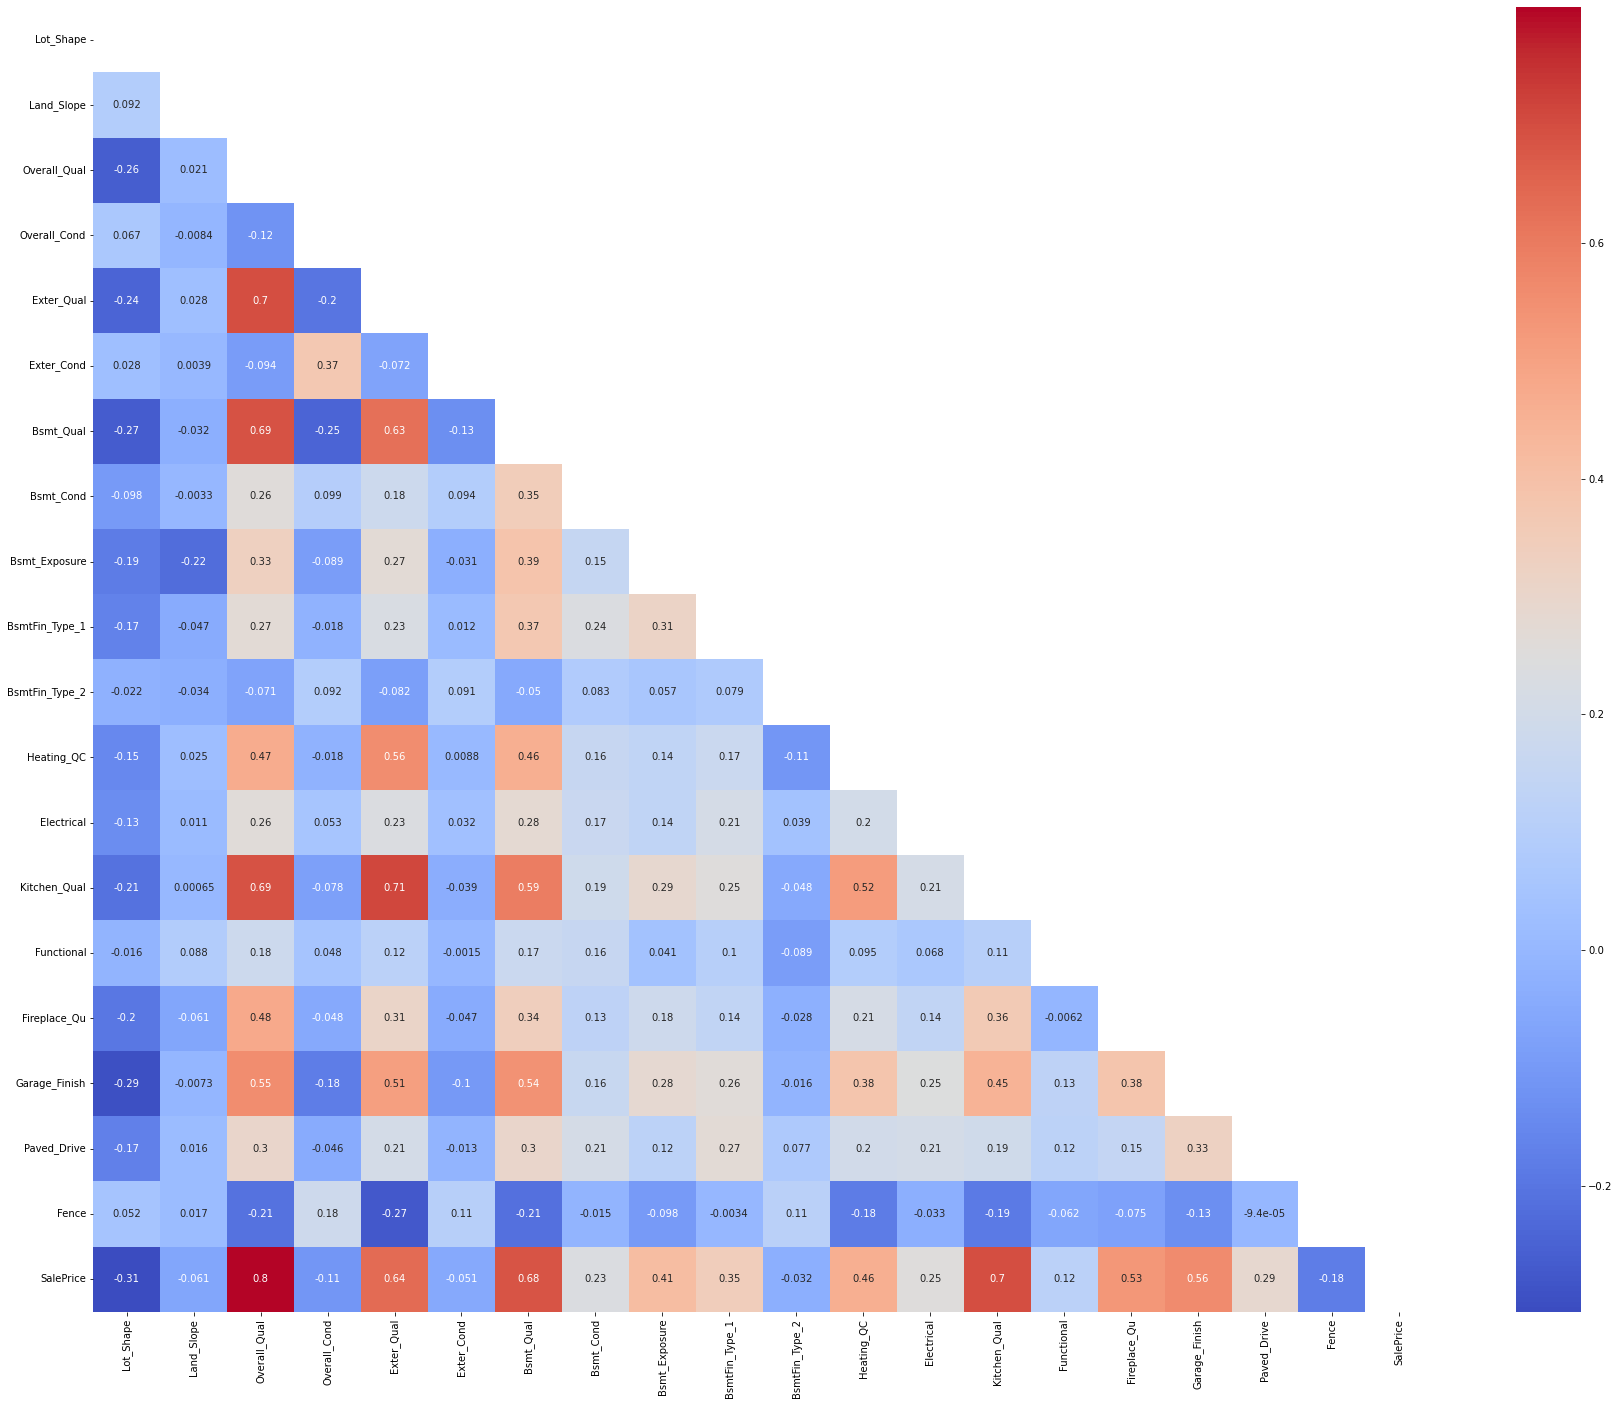

In [37]:
plt.figure(figsize=(30,24))
sns.heatmap(train[features_ord+['SalePrice']].corr(), annot=True, cmap='coolwarm', 
            mask = np.triu(train[features_ord+['SalePrice']].corr())
           )

### Interpretation from Heatmap
Bsmt_Cond, Electrical, Functional and Paved_Drive have very low correlation below 0.3 due to the high number of outliers, so we remove them from our features to model.

Overall_Qual, Exter_Qual, Bsmt_Qual and Kitchen_Qual have correlation above 0.6.

Fireplace_Qu and Garage_Finish have correlation between 0.5 and 0.6.

Bsmt_Exposure, Heating_QC have correlation between 0.4 and 0.5.


There are no pairs that are highly correlated (exceed 0.8), but we will need to investigate if the earlier selected list of features with values (from section (1)) have high correlation with these features.

We now have 8 ordinal features selected.

In [38]:
features_ord_selected = ['Overall_Qual', 'Exter_Qual', 'Bsmt_Qual', 'Kitchen_Qual', 
                         'Fireplace_Qu', 'Garage_Finish', 'Bsmt_Exposure', 'Heating_QC'
                        ]

<AxesSubplot:>

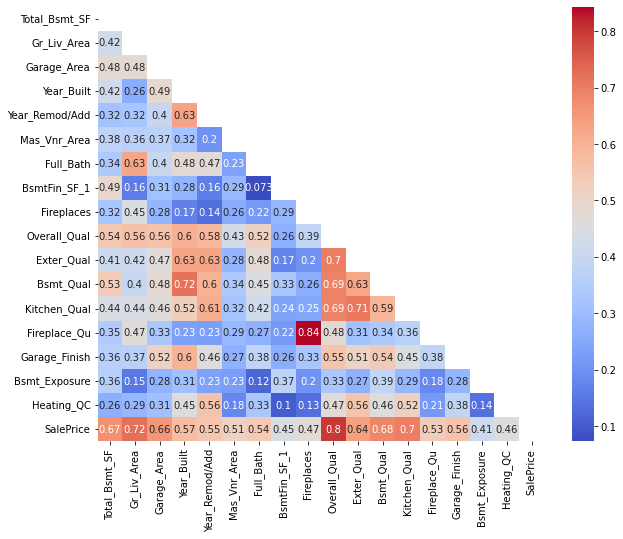

In [39]:
# check correlation between features selected so far from groups (1) and (2)
f_val_ord_selected = features_val_selected + features_ord_selected
plt.figure(figsize=(10,8))
sns.heatmap(train[f_val_ord_selected + ['SalePrice']].corr(), annot=True, cmap='coolwarm', 
            mask = np.triu(train[f_val_ord_selected + ['SalePrice']].corr())
           )

### Interpretation from Heatmap
Fireplaces and Fireplace_Qu have high correlation. We remove Fireplaces as it has lower correlation.

We now have 8 + 8 = 16 features selected.

In [40]:
f_val_ord_selected.remove('Fireplaces')

## (3) Nominal
We want to one-hot encode relevant features without creating too many columns.

In [41]:
# check categories and number of observations in each category for each feature
for feature in features_nom:
    print(train[feature].value_counts())
    print()

20     766
60     393
50     198
120    132
30     101
70      89
160     88
80      86
90      75
190     46
85      28
75      16
180     11
45      11
40       4
150      1
Name: MS_SubClass, dtype: int64

RL         1594
RM          314
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS_Zoning, dtype: int64

Pave    2038
Grvl       7
Name: Street, dtype: int64

N_A     1905
Grvl      85
Pave      55
Name: Alley, dtype: int64

Lvl    1840
HLS      84
Bnk      78
Low      43
Name: Land_Contour, dtype: int64

Inside     1499
Corner      347
CulDSac     131
FR2          60
FR3           8
Name: Lot_Config, dtype: int64

NAmes      309
CollgCr    180
OldTown    163
Edwards    140
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     75
Crawfor     71
IDOTRR      68
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veen

/Users/family/opt/anaconda3/envs/nov20/lib/python3.8/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


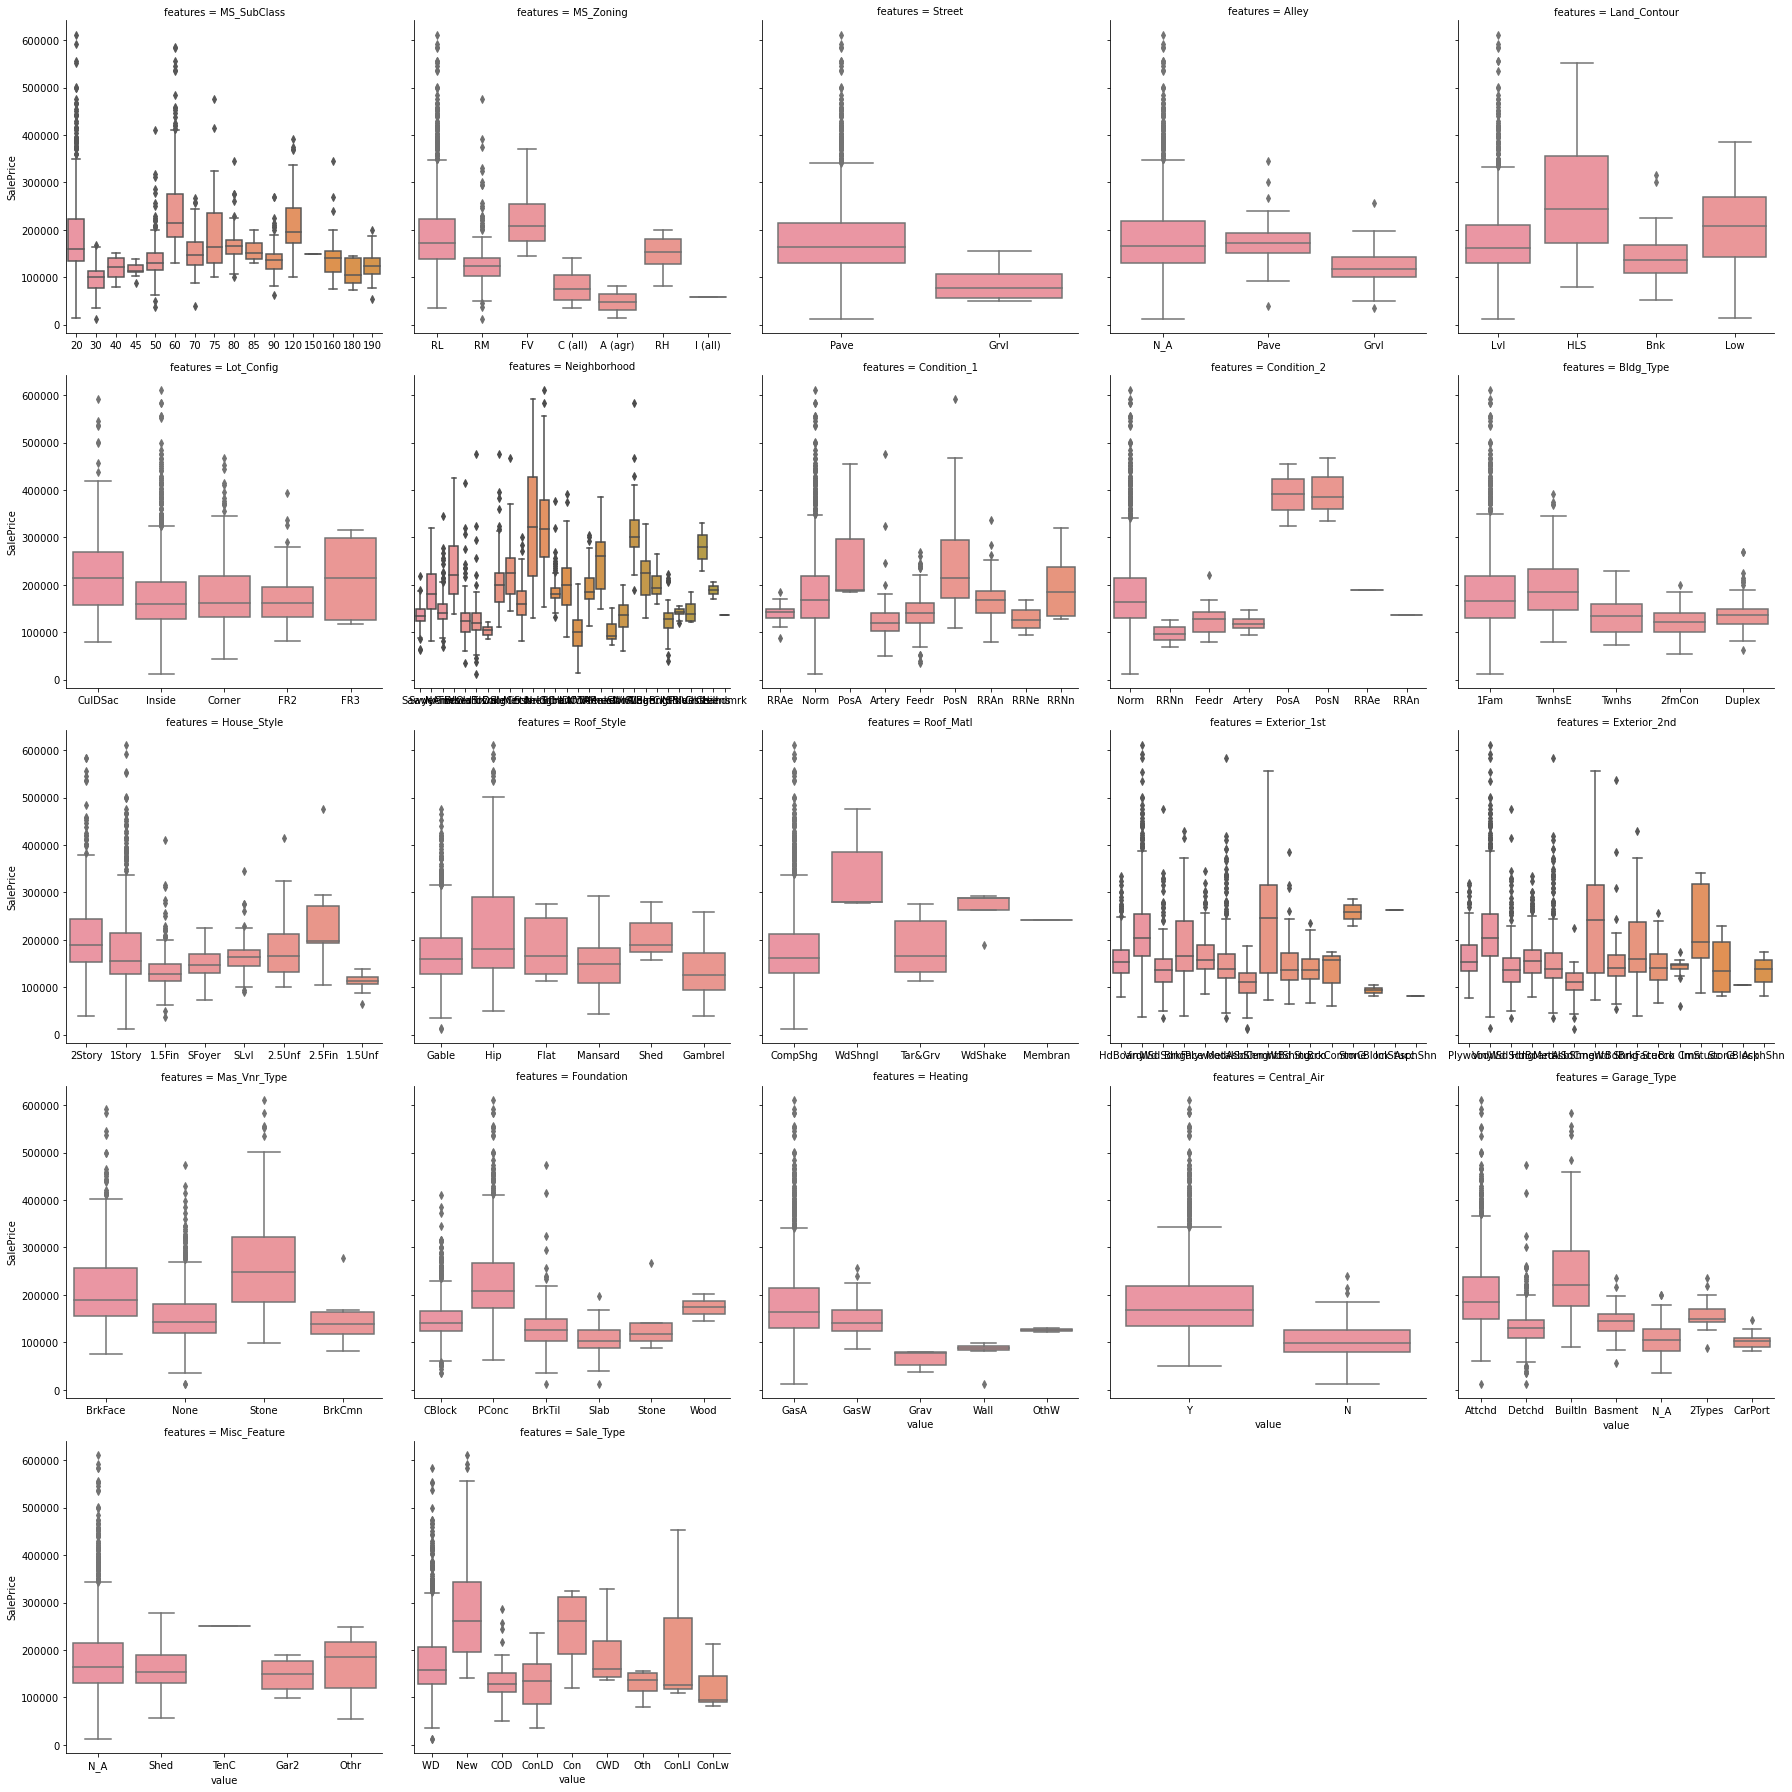

In [42]:
# boxplots
train_melt_nom = train[features_nom+['SalePrice']].melt(id_vars=['SalePrice'], var_name='features')
sns.catplot(data=train_melt_nom, x='value', y='SalePrice', col='features', col_wrap=5, kind='box', sharex=False)

### Neighborhoods
For Neighborhoods, there are 28 different categories with some significant variation that is hard to group. We draw a new boxplot with lines at 10th, 25th, 50th, 75th and 90th percentile SalePrice to see if there is a reasonable way to group categories in this feature.

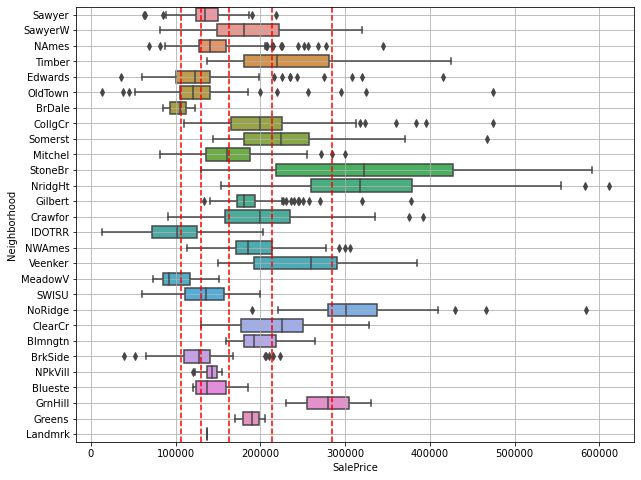

In [43]:
# plot Neighborhood in other orientation to read names clearly
plt.figure(figsize=(10,8))
sns.boxplot(y=train.Neighborhood, x=train.SalePrice)

# plot vertical lines at various percentiles
for perc_value in np.percentile(train.SalePrice, [10, 25, 50, 75, 90]):
    plt.axvline(perc_value, color='r', linestyle='--')
    
plt.grid()
plt.show()

We will create 3 categories by grouping the neighborhoods based on their median SalePrice
- StoneBr, NridgHt, NoRidge: median more than 90th percentile
- Edwards, OldTown, BrDale, IDOTRR, MeadowV, BrkSide: median less than 25th percentile
- the rest

### Features to drop
Other than Neighborhood, we try to split each feature into 2 categories if there is an obvious group with higher SalePrice than the other group.

We drop the following features as there is no obvious way to split - Alley, Land_Contour, Lot_Config, Condition_1, Bldg_Type, House_Style, Roof_Style, Exterior_1st, Exterior_2nd, Mas_Vnr_Type, Misc_Feature.

We drop the following features as the obvious group has a very small number of observations (less than 10) - Street, Condition_2, Roof_Matl, Heating

The rest will be encoded using a function we will write below

In [44]:
# drop 15 features mentioned above from features_nom
for feature in ['Street', 'Alley', 'Land_Contour', 'Lot_Config', 'Condition_1', 
                'Condition_2', 'Bldg_Type', 'House_Style', 'Roof_Style', 'Roof_Matl', 
                'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Heating', 'Misc_Feature'
               ]:
    features_nom.remove(feature)

In [45]:
# we are now left with these 7 nominal features
features_nom

['MS_SubClass',
 'MS_Zoning',
 'Neighborhood',
 'Foundation',
 'Central_Air',
 'Garage_Type',
 'Sale_Type']

In [46]:
# write a function to encode nominal features
def encode_nom(series, main_cat_list):
    transformed_list = []
    for x in series:
        if x in main_cat_list:
            transformed_list.append(1)
        else:
            transformed_list.append(0)
    return transformed_list

# test that our function works as intended
series = ['a', 'b', 'a', 'c', 'c', 'a']
cat = ['a', 'b']
encode_nom(series, cat)

[1, 1, 1, 0, 0, 1]

In [47]:
# transform MS_SubClass to group 20, 60 and 120 as 1, the rest as 0
# these are 3 of the 4 categories that are 1946 and newer
# the other category is 160 but the median is significantly lower
train.MS_SubClass = encode_nom(train.MS_SubClass, [20, 60, 120])

# transform MS_Zoning to indicate FV and RL as 1, the rest as 0
train.MS_Zoning = encode_nom(train.MS_Zoning, ['FV', 'RL'])

# create Neighborhood_High to indicate StoneBr, NridgHt and NoRidge as 1, the rest as 0
train['Neighborhood_High'] = encode_nom(train.Neighborhood, ['StoneBr', 'NridgHt', 'NoRidge Lvl'])

# create Neighborhood_Low to indicate Edwards, OldTown, BrDale, IDOTRR, MeadowV and BrkSide as 1, the rest as 0
train['Neighborhood_Low'] = encode_nom(train.Neighborhood, 
                                       ['Edwards', 'OldTown', 'BrDale', 'IDOTRR', 'MeadowV', 'BrkSide']
                                      )

# transform Foundation to indicate PConc as 1, the rest as 0 
train.Foundation = encode_nom(train.Foundation, ['PConc'])

# transform Central_Air to indicate Y as 1, the rest as 0
train.Central_Air = encode_nom(train.Central_Air, ['Y'])

# transform Garage_Type to indicate Attchd and BuiltIn as 1, the rest as 0
train.Garage_Type = encode_nom(train.Garage_Type, ['Attchd', 'BuiltIn'])

# transform Sale_Type to indicate New as 1, the rest as 0
# Con also has somewhat higher SalePrice but there are only 4 observations 
# and the description is similar to ConLw, ConLI and ConLD so we do not include it
train.Sale_Type = encode_nom(train.Sale_Type, ['New'])


In [48]:
features_nom.remove('Neighborhood')
features_nom = features_nom + ['Neighborhood_High', 'Neighborhood_Low']

In [49]:
# check categories (should be only 0 or 1) and percentage of observations in each category after transformations
for feature in features_nom:
    print(train[feature].value_counts(normalize=True))
    print()

1    0.631296
0    0.368704
Name: MS_SubClass, dtype: float64

1    0.828851
0    0.171149
Name: MS_Zoning, dtype: float64

0    0.548655
1    0.451345
Name: Foundation, dtype: float64

1    0.931051
0    0.068949
Name: Central_Air, dtype: float64

1    0.655746
0    0.344254
Name: Garage_Type, dtype: float64

0    0.922738
1    0.077262
Name: Sale_Type, dtype: float64

0    0.92176
1    0.07824
Name: Neighborhood_High, dtype: float64

0    0.76088
1    0.23912
Name: Neighborhood_Low, dtype: float64



/Users/family/opt/anaconda3/envs/nov20/lib/python3.8/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


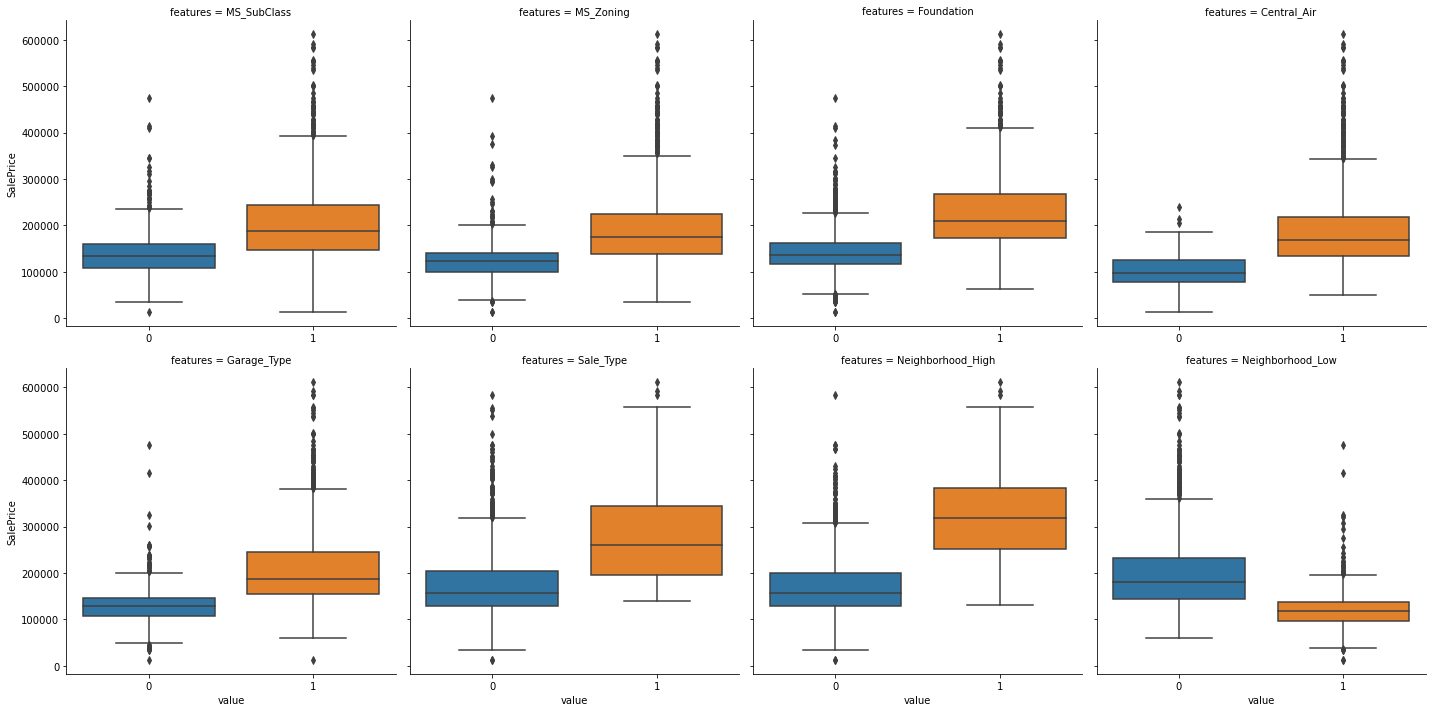

In [50]:
# check boxplots after transforming features
train_melt_nom = train[features_nom+['SalePrice']].melt(id_vars=['SalePrice'], var_name='features')
sns.catplot(data=train_melt_nom, x='value', y='SalePrice', col='features', col_wrap=4, kind='box', sharex=False)

With our current list of shortlisted nominal features, we check their correlation with SalePrice.

<AxesSubplot:>

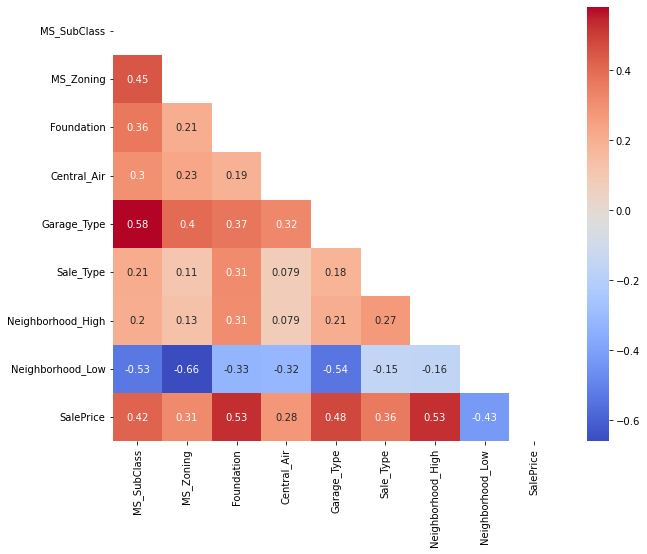

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(train[features_nom+['SalePrice']].corr(), annot=True, cmap='coolwarm', 
            mask = np.triu(train[features_nom+['SalePrice']].corr())
           )

### Interpretation from Heatmap
MS_SubClass, Foundation, Garage_Type, Neighborhood_High and Neighborhood_Low have correlation above 0.4 (or below -0.4 for Neighborhood_Low), so we select these features and remove the others.

We will need to investigate if the earlier selected list of features with values (from sections (1) and (2)) have high correlation with these 5 features.

<AxesSubplot:>

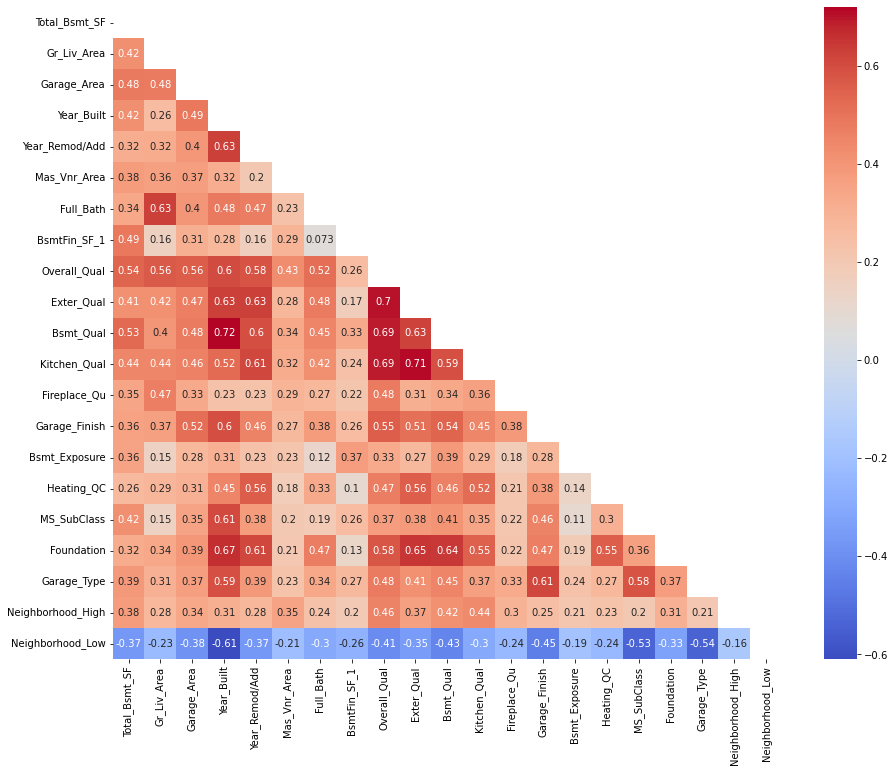

In [52]:
# check correlation between all features selected
final_selected = f_val_ord_selected + ['MS_SubClass', 'Foundation', 'Garage_Type', 
                                       'Neighborhood_High', 'Neighborhood_Low']
plt.figure(figsize=(15,12))
sns.heatmap(train[final_selected].corr(), annot=True, cmap='coolwarm', mask = np.triu(train[final_selected].corr()))

### Interpretation from Heatmap
No other pairs with high correlation found. We now have 8 + 8 + 5 = 21 features selected.

### Save Train and Test Data with selected features
We save new csvs that only include the features we selected, transformed in the way we want.

In [53]:
# create new dataframe for Train Data with only the selected features, check no missing values and save to csv
train_sel = train[final_selected + ['SalePrice']]
train_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2045
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Total_Bsmt_SF      2045 non-null   float64
 1   Gr_Liv_Area        2045 non-null   int64  
 2   Garage_Area        2045 non-null   float64
 3   Year_Built         2045 non-null   int64  
 4   Year_Remod/Add     2045 non-null   int64  
 5   Mas_Vnr_Area       2045 non-null   float64
 6   Full_Bath          2045 non-null   int64  
 7   BsmtFin_SF_1       2045 non-null   float64
 8   Overall_Qual       2045 non-null   float64
 9   Exter_Qual         2045 non-null   int64  
 10  Bsmt_Qual          2045 non-null   int64  
 11  Kitchen_Qual       2045 non-null   int64  
 12  Fireplace_Qu       2045 non-null   int64  
 13  Garage_Finish      2045 non-null   int64  
 14  Bsmt_Exposure      2045 non-null   int64  
 15  Heating_QC         2045 non-null   int64  
 16  MS_SubClass        2045 

In [54]:
train_sel.to_csv('datasets/train_sel.csv', index=False)

In [55]:
# transform 8 ordinal features 

# transform Overall Qual by merging 1-4 and 9-10, using the weighted averages from Train Data
test.Overall_Qual = encode_ord(test.Overall_Qual, [1,2,3,4,5,6,7,8,9,10], [wt1,wt1,wt1,wt1,5,6,7,8,wt2,wt2])

# transform Exter_Qual into 2 categories, 1 for Ex/Gd and 0 for TA/Fa
test.Exter_Qual = encode_ord(test.Exter_Qual, ['Ex', 'Gd', 'TA', 'Fa'], [1 , 1, 0, 0])

# transform Bsmt_Qual into 4 categories, 3 for Ex, 2 for Gd, 1 for TA, 0 for Fa/Po/N_A
test.Bsmt_Qual = encode_ord(test.Bsmt_Qual, ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'N_A'], [3,2,1,0,0,0])

# transform Kitchen_Qual into 3 categories, 2 for Ex, 1 for Gd, 0 for TA/Fa
# Po added in under 0
test.Kitchen_Qual = encode_ord(test.Kitchen_Qual, ['Ex', 'Gd', 'TA', 'Fa', 'Po'], [2 , 1, 0, 0, 0])

# transform Fireplace_Qu into 4 categories, 3 for Ex/Gd, 2 for TA, 1 for Fa/Po, 0 for N_A
test.Fireplace_Qu = encode_ord(test.Fireplace_Qu, ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'N_A'], [3,3,2,1,1,0])

# transform Garage_Finish into 4 categories, 3 for Fin, 2 for RFn, 1 for Unf, 0 for N_A
test.Garage_Finish = encode_ord(test.Garage_Finish, ['Fin', 'RFn', 'Unf', 'N_A'], [3,2,1,0])

# transform Bsmt_Exposure into 4 categories, 3 for Gd, 2 for Av, 1 for Mn, 0 for No/N_A
test.Bsmt_Exposure = encode_ord(test.Bsmt_Exposure, ['Gd', 'Av', 'Mn', 'No', 'N_A'], [3,2,1,0,0])

# transform Heating_QC into 3 categories, 2 for Ex, 1 for Gd, 0 for the rest
test.Heating_QC = encode_ord(test.Heating_QC, ['Ex', 'Gd', 'TA', 'Fa', 'Po'], [2 , 1, 0, 0, 0])

In [56]:
# check categories (should be numeric) and percentage of observations in each category after transformations
for feature in final_selected[8:16]:
    print(test[feature].value_counts(normalize=True))
    print()

5.000000    0.298405
6.000000    0.257403
7.000000    0.194761
8.000000    0.113895
3.705000    0.093394
9.214286    0.042141
Name: Overall_Qual, dtype: float64

0    0.638952
1    0.361048
Name: Exter_Qual, dtype: float64

1    0.451025
2    0.404328
3    0.083144
0    0.061503
Name: Bsmt_Qual, dtype: float64

0    0.536446
1    0.403189
2    0.060364
Name: Kitchen_Qual, dtype: float64

0    0.480638
3    0.264237
2    0.219818
1    0.035308
Name: Fireplace_Qu, dtype: float64

1    0.435080
2    0.265376
3    0.248292
0    0.051253
Name: Garage_Finish, dtype: float64

0    0.674260
2    0.148064
3    0.091116
1    0.086560
Name: Bsmt_Exposure, dtype: float64

2    0.488610
0    0.332574
1    0.178815
Name: Heating_QC, dtype: float64



In [57]:
# transform 3 nominal features and create Neighborhood_High and Neighborhood_Low

# transform MS_SubClass to group 20, 60 and 120 as 1, the rest as 0
test.MS_SubClass = encode_nom(test.MS_SubClass, [20, 60, 120])

# create Neighborhood_High to indicate StoneBr, NridgHt and NoRidge as 1, the rest as 0
test['Neighborhood_High'] = encode_nom(test.Neighborhood, ['StoneBr', 'NridgHt', 'NoRidge Lvl'])

# create Neighborhood_Low to indicate Edwards, OldTown, BrDale, IDOTRR, MeadowV and BrkSide as 1, the rest as 0
test['Neighborhood_Low'] = encode_nom(test.Neighborhood, 
                                       ['Edwards', 'OldTown', 'BrDale', 'IDOTRR', 'MeadowV', 'BrkSide']
                                      )

# transform Foundation to indicate PConc as 1, the rest as 0 
test.Foundation = encode_nom(test.Foundation, ['PConc'])

# transform Garage_Type to indicate Attchd and BuiltIn as 1, the rest as 0
test.Garage_Type = encode_nom(test.Garage_Type, ['Attchd', 'BuiltIn'])

In [58]:
# check categories (should be 0 and 1 only) and percentage of observations in each category after transformations
for feature in final_selected[16:]:
    print(test[feature].value_counts(normalize=True))
    print()

1    0.625285
0    0.374715
Name: MS_SubClass, dtype: float64

0    0.563781
1    0.436219
Name: Foundation, dtype: float64

1    0.650342
0    0.349658
Name: Garage_Type, dtype: float64

0    0.93508
1    0.06492
Name: Neighborhood_High, dtype: float64

0    0.765376
1    0.234624
Name: Neighborhood_Low, dtype: float64



In [59]:
# save datasets
test_sel = test[['Id']+final_selected]
test_sel.to_csv('datasets/test_sel.csv', index=False)